In [ ]:
import os
import random
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab-Notebooks/data@anz

Mounted at /content/drive
/content/drive/My Drive/Colab-Notebooks/data@anz


In [ ]:
import pandas as pd

import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('./data/ANZ-synthesised-transaction-dataset.xlsx')

In [ ]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [ ]:
df.shape

(12043, 23)

## Data Cleaning

### Missing data

In [ ]:
df['bpay_biller_code'].isna().sum()


11158

In [ ]:
df['merchant_code'].isna().sum()

11160

In [ ]:
# Percentage of missing values in each column
round(df.isnull().sum() / df.shape[0] * 100,2)

status                0.00
card_present_flag    35.92
account               0.00
currency              0.00
long_lat              0.00
txn_description       0.00
merchant_id          35.92
first_name            0.00
balance               0.00
date                  0.00
gender                0.00
age                   0.00
merchant_suburb      35.92
merchant_state       35.92
extraction            0.00
amount                0.00
transaction_id        0.00
country               0.00
customer_id           0.00
merchant_long_lat    35.92
movement              0.00
dtype: float64

we constate that there is a lot of missing data (>90%) in columns bpay_biller_code and merchant_code so it is better to delete all columns that contains more than 70% of missing values

In [ ]:
for c in df.columns:
    if (100.0 * df[c].isna().sum() / df.shape[0]) > 70:
        df.drop(c,1,inplace=True)

### Data Exploration

In [ ]:
df.describe()

,card_present_flag,balance,age,amount
count,7717.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,14704.195553,30.582330,187.933588
std,0.398029,31503.722652,10.046343,592.599934
min,0.000000,0.240000,18.000000,0.100000
25%,1.000000,3158.585000,22.000000,16.000000
50%,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,12465.945000,38.000000,53.655000
max,1.000000,267128.520000,78.000000,8835.980000


In [ ]:
df.shape

(12043, 21)

In [ ]:
# check the average of transaction amount 
amount_total = df['amount'].sum()
amount_count = df['amount'].count()
transaction_amount_avg = round(amount_total / amount_count,2)
transaction_amount_avg

187.93

In [ ]:
#change the dtype of date column to datetime
df['date'] = pd.to_datetime(df['date'])
df.date.unique()[0]

numpy.datetime64('2018-08-01T00:00:00.000000000')

In [ ]:
#add three new columns (year, month, day) from the date transactionn 
df['day']= df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year
df.columns[-3:]

Index(['day', 'month', 'year'], dtype='object')

### Transaction made by Gender

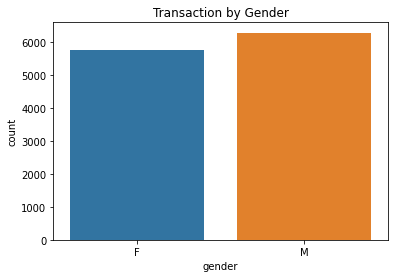

In [ ]:
sns.countplot(data=df, x='gender')
plt.title('Transaction by Gender')
plt.show()

### Transactions by Month & Day

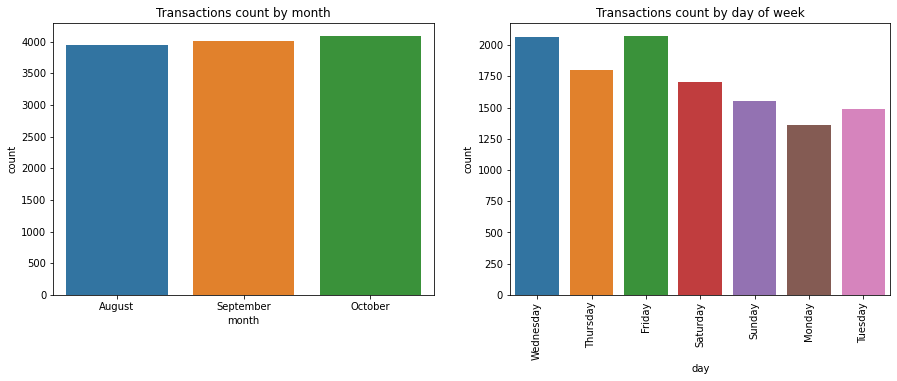

In [ ]:
plt.figure(figsize=[15, 5])

plt.subplot(1,2,1)
sns.countplot(data=df, x = 'month')
plt.title('Transactions count by month')

plt.subplot(1,2,2)
sns.countplot(data=df, x = 'day')
plt.title('Transactions count by day of week')
plt.xticks(rotation=90)
plt.show()

### Transaction by States

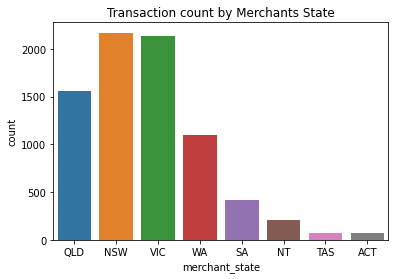

In [ ]:
sns.countplot(data=df,x='merchant_state')
plt.title('Transaction count by Merchants State')
plt.show()


### Transaction made by Transaction Mode

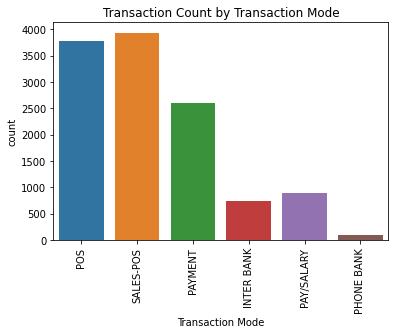

In [ ]:
sns.countplot(data=df, x = 'txn_description')
plt.title('Transaction Count by Transaction Mode')
plt.xlabel('Transaction Mode')
plt.xticks(rotation=90)
plt.show()

### Age of customers

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


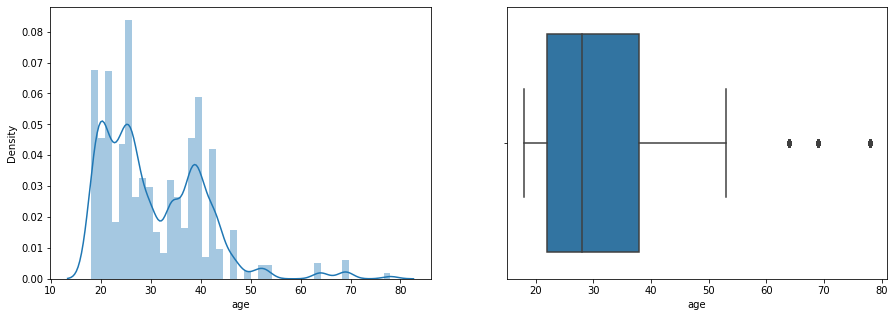

In [ ]:
plt.figure(figsize=[15, 5])

plt.subplot(1,2,1)
sns.distplot(df['age'])

plt.subplot(1,2,2)
sns.boxplot(df['age'])

we can say that most of customers are young, between 18 and 30 years old

### number of customers with card

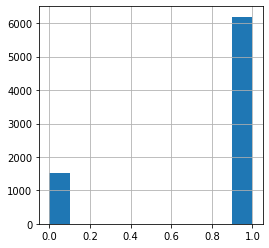

In [ ]:
df['card_present_flag'].hist(figsize = (4,4))

### Transaction amout by gender

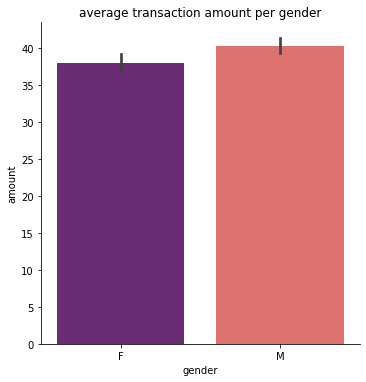

In [ ]:
sns.catplot(x="gender", y="amount", kind="bar", data=df.query('amount <= 350') , palette = 'magma')
plt.title('average transaction amount per gender');

### cutomers with the highest number of transaction

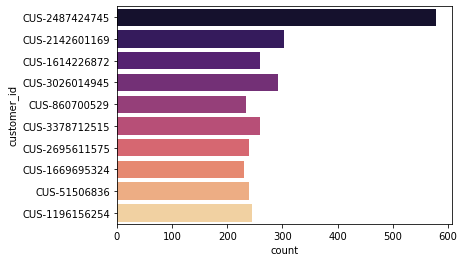

In [ ]:
# cutomers with the highest number of transactions
df2 = df.loc[df['customer_id'].isin(df.customer_id.value_counts()[:10].index)]
sns.countplot(y = 'customer_id', data=df2 , palette = 'magma');